## Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">FILL IN TIME</span>
* A2. Gradient Orientation: <span style="color:red;">FILL IN TIME</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">FILL IN TIME</span>
* B. Hough Transform (Circles):  <span style="color:red;">FILL IN TIME</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

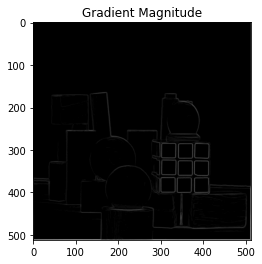

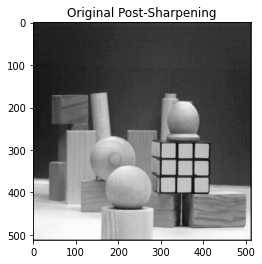

In [184]:
# Part 1. Compute the Gradient Magnitude
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import math
import numpy as np

def medianBlurr(image,size=3):
    # Create a result buffer so that you don't affect the original image
    result = np.zeros(image.shape)
        
    shape = result.shape
    rows, cols = shape[0], shape[1]
    
    radius = (size-1)//2
    kernel_size = size**2
    median_index = (kernel_size//2) + 1
          
    for row in range(radius, rows-radius):
        for col in range(radius, cols-radius):
            kernel = sorted(image[row-radius:row+radius+1, col-radius:col+radius+1].flatten())
            result[row, col] = kernel[median_index]
    
    return np.array(result, dtype=np.int32)

def sharpen(image):
    kernel = np.matrix([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])
    
    return np.array(ndi.convolve(image, kernel), dtype=np.int32).clip(0, 255)


def meanBlurr(image):
    meanKernel = np.matrix([[1, 1, 1],
                            [1, 1, 1],
                            [1, 1, 1]])
    
    result = np.array(ndi.convolve(image, meanKernel)/9, dtype=np.int32)
    
    return result.clip(0, 255)
            
def gradientMagnitude(image):    
    kernel_x = np.matrix([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

    kernel_y = np.matrix([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])

    derivative_x = np.array(ndi.convolve(image, kernel_x)/8, dtype=np.int32)
    derivative_y = np.array(ndi.convolve(image, kernel_y)/8, dtype=np.int32)
        
    shape = image.shape
    rows, cols = shape[0], shape[1]
    
    result = np.zeros(shape)
    
    for row in range(rows):
        for col in range(cols):
            result[row,col] = int(math.sqrt(math.pow(derivative_x[row,col],2) + math.pow(derivative_y[row,col],2)))
    
    result = result.clip(0, 255)
    
    return np.where(result > 5, result, 0)
    

# matrix starts as a float [0.0, 1.0], so first we convert to [0, 255]
image_og = plt.imread('blocks.png') * 255
image_og = medianBlurr(image_og)

plt.imshow(gradientMagnitude(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Gradient Magnitude")
plt.show()

plt.imshow(image_og, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original Post-Sharpening")
plt.show()

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

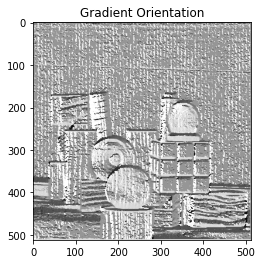

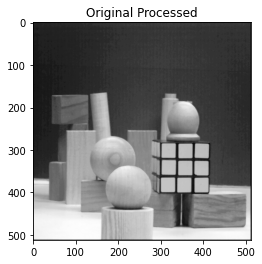

In [185]:
# Part 2. Compute the Gradient Orientation
def gradientOrientation(image):    
    kernel_x = np.matrix([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])

    kernel_y = np.matrix([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])
    
    derivative_x = np.array(ndi.convolve(image, kernel_x)/8, dtype=np.int32)
    derivative_y = np.array(ndi.convolve(image, kernel_y)/8, dtype=np.int32)
        
    shape = image.shape
    rows, cols = shape[0], shape[1]
    
    result = np.zeros(shape)
    
    for row in range(rows):
        for col in range(cols):
            # With this the value is now between [0, 2pi]
            orientation = math.atan2(derivative_y[row,col], derivative_x[row, col]) + math.pi
            # Now the orientation should be between [0, 255]
            orientation = orientation * 128.5 / math.pi
            result[row,col] = orientation
            
            
    # This is just to change the type back to an integer
    result = np.array(result, dtype=np.int32)
    
    return result


# Show your results on the blocks image
plt.imshow(gradientOrientation(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Gradient Orientation")
plt.show()

plt.imshow(image_og, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original Processed")
plt.show()

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



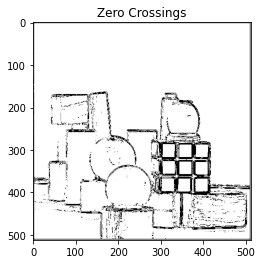

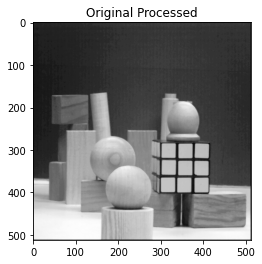

In [186]:
# Part 3. Find the Zero Crossings
def laplacian(image):    
    laplacian_kernel = np.matrix([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])
    
    result = ndi.convolve(gradientMagnitude(image), laplacian_kernel)
    result = np.where(abs(result) < 10, 255, 0)
        
    return result


# Show your results on the blocks image
plt.imshow(laplacian(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Zero Crossings")
plt.show()

plt.imshow(image_og, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original Processed")
plt.show()

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


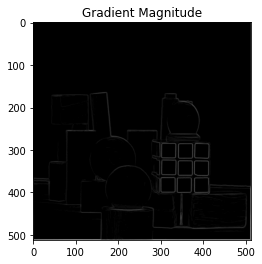

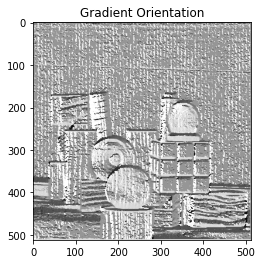

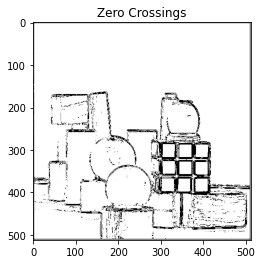

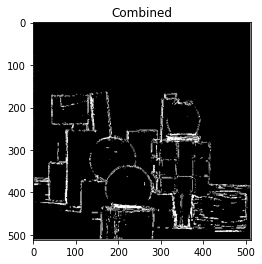

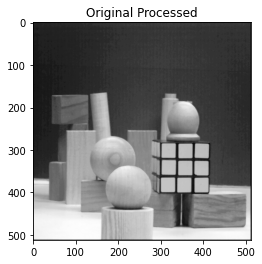

In [187]:
# Part 4. Final Solution
def combined(image):
    zeroCrossings = np.array(laplacian(image)/255, dtype = np.int32)
    gradientMagn = np.array(gradientMagnitude(image), dtype = np.int32)

    result_image = gradientMagn * zeroCrossings
    
    # elements are tuples (x,y)
    result_edges = []
    shape = result_image.shape
    rows, cols = shape[0], shape[1]
    
    for row in range(rows):
        for col in range(cols):
            if result_image[row,col] > 4:
                result_edges.append((row,col))
    
    return np.where(result_image > 4, 255, 0), result_edges


# Show the results on blocks image
plt.imshow(gradientMagnitude(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Gradient Magnitude")
plt.show()

plt.imshow(gradientOrientation(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Gradient Orientation")
plt.show()

plt.imshow(laplacian(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Zero Crossings")
plt.show()

combined_image, edges = combined(image_og)
plt.imshow(combined_image, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Combined")
plt.show()

plt.imshow(image_og, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original Processed")
plt.show()

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.

Results are good, managed to show the rough outline of the image and my code has some parameters I can change to try new things out easily. One question I have is: What is the best way to pre-process an image? In my case I'm using a combination of mean and median blurring, and it did improve my results up to a point. I was wondering how I could do that better. 
    
A1 = 2 hours
A2 = 1 hour
A3 = 30 mins
A4 = 30 mins
</span>



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

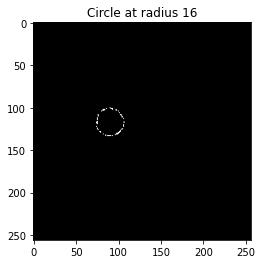

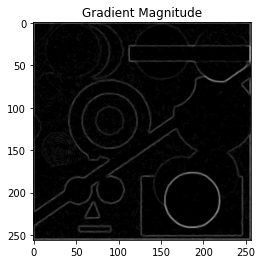

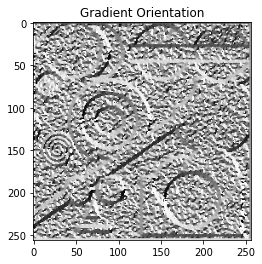

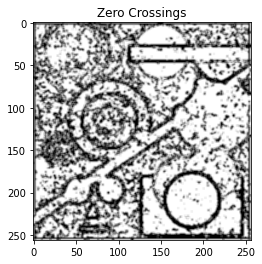

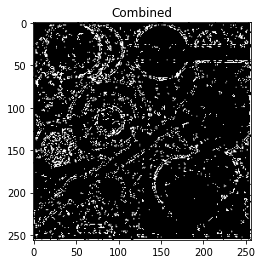

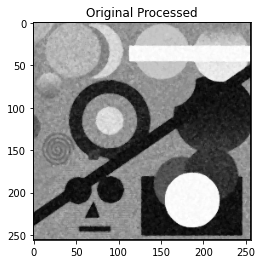

In [188]:
def toGrayScale(image):
    shape = image.shape
    rows, cols = shape[0], shape[1]

    result = np.zeros(shape)
    
    for row in range(rows):
        for col in range(cols):
            ave = int(np.average(image[row,col]))
            result[row,col] = ave
            
    result = np.array(result[:,:,0], dtype=np.int32)
    
    return result

# matrix starts as a float [0.0, 1.0], so first we convert to [0, 255]
image_og = plt.imread('circles.png') * 255
# We convert to grayscale because it is easier to process
image_og = toGrayScale(image_og)
# Remove some of the noise
# image_og = np.array(meanBlurr(image_og), dtype=np.int32)
image_og = np.array(medianBlurr(image_og), dtype=np.int32)
# image_og = np.array(meanBlurr(image_og), dtype=np.int32)
# image_og = np.array(sharpen(image_og), dtype=np.int32)

#return row,col of maxima
def maxima_for(image, edges_arg, radius):
    shape = image.shape
    rows, cols = shape[0], shape[1]
    
    radius_sqr = math.pow(radius, 2)
    radius_min_sqr = math.pow(radius-1, 2)
    radius_max_sqr = math.pow(radius+1, 2)
    
    # each element is the counter for that pixel
    result = np.zeros(shape)
    for edge in edges_arg:
        min_row = max(edge[0]-radius, 0)
        max_row = min(edge[0]+radius, rows)
        min_col = max(edge[1]-radius, 0)
        max_col = min(edge[1]+radius, cols)
        for row in range(min_row, max_row):
            for col in range(min_col, max_col):
                calc = math.pow(edge[0]-row,2) + math.pow(edge[1]-col,2)
                if calc > radius_min_sqr and calc < radius_max_sqr:
                    result[row,col] += 1
    
    max_row, max_col = 0, 0
    maxima_val = -1
    for row in range(rows):
        for col in range(cols):
            if result[row,col] > maxima_val:
                maxima_val = result[row,col]
                max_row, max_col = row, col

    return max_row, max_col

def image_with_circle(image, center_row, center_col, radius, mercy = 1):
    shape = image.shape
    rows, cols = shape[0], shape[1]
    
    result = np.zeros(shape)
    
    radius_min = math.pow(radius-mercy, 2)
    radius_max = math.pow(radius+mercy, 2)
    
    for row in range(rows):
        for col in range(cols):
            if image[row,col] > 4:
                calc = math.pow(row-center_row,2) + math.pow(col-center_col,2)
                if calc <= radius_max and calc >= radius_min:
                    result[row,col] = image[row,col]
                    
    return result
                
    
# Part B - Hough Transform - code below
combined_image, edges = combined(image_og)
# Element counter_image[row,col] is the counter. We only care about the edges, and the iteration is for each radius
maxima_row, maxima_col = maxima_for(combined_image, edges, 16)
img = image_with_circle(combined_image, maxima_row, maxima_col, 16)

plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Circle at radius 16")
plt.show()

plt.imshow(gradientMagnitude(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Gradient Magnitude")
plt.show()

plt.imshow(gradientOrientation(image_og), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Gradient Orientation")
plt.show()

plt.imshow(meanBlurr(laplacian(image_og)), cmap="Greys_r", vmin=0, vmax=255)
plt.title("Zero Crossings")
plt.show()

plt.imshow(combined_image, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Combined")
plt.show()

plt.imshow(image_og, cmap="Greys_r", vmin=0, vmax=255)
plt.title("Original Processed")
plt.show()

##### Part B: Write-up

Unfortunately I ran out of time. I got to the point that I was able to find a circle with radius=16. With the methods I created I should be able to scale that to all possible radius', but I took too long with the project. Some adjustments I made was turning the image to greyscale to make it easier to recognize shapes without having to worry about the 3 elements in RGB. I did some smoothing but I also think I could have improved my pre-processing so that the combined image is more clear. This part took me about 7 hours to complete. 

<span style="color:red">Please describe your results here and any questions, etc. above.</span>

